In [55]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from os import listdir
from os.path import isfile, join
import ineqpy
DATA_dir = "DataAnalysis/data/"

In [56]:
data_filenames = [f for f in listdir(DATA_dir) if isfile(join(DATA_dir, f))]
print(data_filenames)

['2021-01-18 17.17 Agent Vars.csv', '2021-01-18 17.17 Model Vars.csv']


In [59]:
df_concat_list = []
run = 0
for data_filename in data_filenames:
    df = pd.read_csv(DATA_dir + data_filename)
    df.insert(0, "Run", run)
    run += 1
    
#     for step in set(df["Step"].tolist()):
#         wealth = np.array( df.loc[(df.Step == step)]["Wealth"].tolist() )
#         gini = ineqpy.gini(np.array(wealth))
#         df.loc[(df.Step == step), "Gini"] = gini
        
    df_concat_list.append(df)

# data_raw = pd.concat(df_concat_list)
# del df_concat_list
# del run
# data_raw

In [60]:
df_concat_list[0]

,Run,Step,AgentID,Wealth,Position
0,0,0,0,2.0,"(47, 28)"
1,0,0,1,2.0,"(24, 7)"
2,0,0,2,2.0,"(43, 25)"
3,0,0,3,2.0,"(49, 32)"
4,0,0,4,2.0,"(19, 3)"
...,...,...,...,...,...
5203,0,199,8-3,585.0,"(39, 13)"
5204,0,199,1-3,568.0,"(40, 16)"
5205,0,199,22-3,599.0,"(13, 38)"
5206,0,199,10-3,599.0,"(37, 13)"


In [61]:
df_concat_list[1]

,Run,Unnamed: 0,Tax Revenue,Inheritance Tax Revenue,Vision,N_Agents,Size,tax brackets,tax percentages,inheritance taxbrackets,inheritance tax percentages,Starting Wealth
0,1,0,0.0,0.0,3,30,50,"[0, 0]","[0, 0]","[0, 10, 30, 50, 100]","[0, 0.1, 0.2, 0.35, 0.6]",2
1,1,1,0.0,0.0,3,30,50,"[0, 0]","[0, 0]","[0, 10, 30, 50, 100]","[0, 0.1, 0.2, 0.35, 0.6]",2
2,1,2,0.0,0.0,3,30,50,"[0, 0]","[0, 0]","[0, 10, 30, 50, 100]","[0, 0.1, 0.2, 0.35, 0.6]",2
3,1,3,0.0,0.0,3,30,50,"[0, 0]","[0, 0]","[0, 10, 30, 50, 100]","[0, 0.1, 0.2, 0.35, 0.6]",2
4,1,4,0.0,0.0,3,30,50,"[0, 0]","[0, 0]","[0, 10, 30, 50, 100]","[0, 0.1, 0.2, 0.35, 0.6]",2
...,...,...,...,...,...,...,...,...,...,...,...,...
196,1,196,0.0,0.0,3,30,50,"[0, 0]","[0, 0]","[0, 10, 30, 50, 100]","[0, 0.1, 0.2, 0.35, 0.6]",2
197,1,197,0.0,0.0,3,30,50,"[0, 0]","[0, 0]","[0, 10, 30, 50, 100]","[0, 0.1, 0.2, 0.35, 0.6]",2
198,1,198,0.0,0.0,3,30,50,"[0, 0]","[0, 0]","[0, 10, 30, 50, 100]","[0, 0.1, 0.2, 0.35, 0.6]",2
199,1,199,0.0,0.0,3,30,50,"[0, 0]","[0, 0]","[0, 10, 30, 50, 100]","[0, 0.1, 0.2, 0.35, 0.6]",2


In [48]:
data = data_raw.groupby(["Run", "Step"]).mean().reset_index()
data = data[["Run", "Step", "Gini"]]
data

,Run,Step,Gini
0,0,0,0.000000
1,0,1,0.176274
2,0,2,0.205659
3,0,3,0.206741
4,0,4,0.201486
5,0,5,0.194883
6,0,6,0.186320
7,0,7,0.174075
8,0,8,0.164365
9,0,9,0.155717


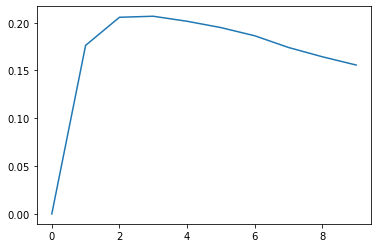

In [49]:
plt.plot(data["Gini"].tolist())

